In [21]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('Datasets/cleaned_data.csv')
df.head()

,date,id,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.finance,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.weather,appCat.utilities,MA
0,2014-03-21,AS14.01,6.20,0.2,0.2,0.134050,17978.907000,6.0,0.0,3139.218,...,49.544,0.0,172.206,239.751,4508.500,915.445,0.000,0.000,598.754,0.134050
1,2014-03-22,AS14.01,6.40,0.6,0.4,0.236880,6142.161000,3.0,1.0,731.429,...,21.076,0.0,0.000,98.143,439.632,37.305,0.000,0.000,117.621,0.190607
2,2014-03-23,AS14.01,6.80,0.2,0.8,0.142741,6773.832001,0.0,0.0,1286.246,...,43.403,0.0,0.000,72.823,900.839,0.000,0.000,30.386,30.086,0.171365
3,2014-03-24,AS14.01,6.00,0.8,0.0,0.078961,15047.351001,10.0,0.0,866.956,...,34.106,0.0,3.010,66.558,3223.626,419.805,0.000,0.000,178.732,0.140922
4,2014-03-25,AS14.01,6.75,0.5,0.5,0.098374,21475.354999,0.0,1.0,1032.768,...,43.054,0.0,0.000,178.819,1919.471,0.000,235.223,0.000,222.893,0.128708


# Feature engineering

## Since mood's correlation with valence, lets predict valence and provide as feature

<AxesSubplot:>

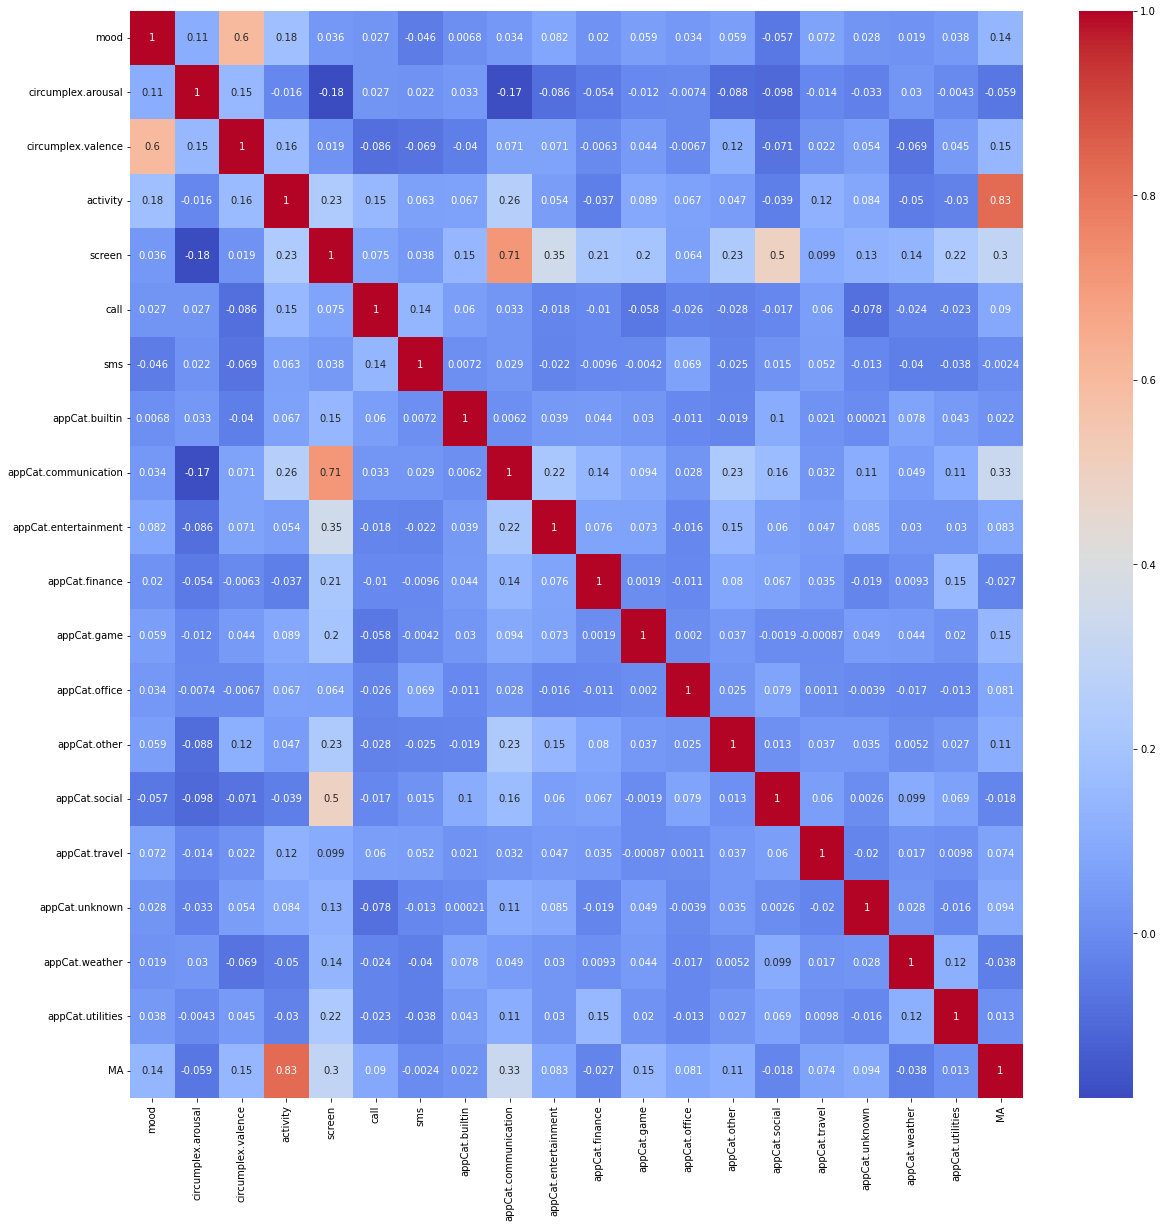

In [25]:
#plot heatmap of correlation
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


## Adjust mood to classification problem
Transform mood from regression to classification problem
- round to integers

In [24]:
print(df['mood'].value_counts())
def round_feature(df:pd.DataFrame, feature:str):
    df[feature] = df[feature].round()
    return df

round_feature(df, 'mood')['mood'].value_counts()

7.0     664
8.0     330
6.0     257
5.0      24
9.0      16
4.0       8
10.0      3
3.0       2
11.0      1
Name: mood, dtype: int64


7.0     664
8.0     330
6.0     257
5.0      24
9.0      16
4.0       8
10.0      3
3.0       2
11.0      1
Name: mood, dtype: int64

In [ ]:
#nested cross validation

## Proportional changes

Predicting numbers may be more difficult than predicting changes. Added benefit is that the model may generalise better

In [5]:
def transform_to_relative_changes(df, feature):
    df[f'{feature}_relative_change'] = df[feature].pct_change()
    return df

transform_to_relative_changes(df, 'mood')

,date,id,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.social,appCat.travel,appCat.unknown,appCat.weather,appCat.utilities,MA,mood_prev_1,mood_prev_2,mood_prev_3,mood_relative_change
0,2014-03-21,AS14.01,6.20000,0.200000,0.200000,0.134050,17978.907000,6.0,0.0,3139.218,...,4508.500,915.445,0.000,0.000,598.754,0.134050,NaN,NaN,NaN,NaN
1,2014-03-22,AS14.01,6.40000,0.600000,0.400000,0.236880,6142.161000,3.0,1.0,731.429,...,439.632,37.305,0.000,0.000,117.621,0.190607,6.2,NaN,NaN,0.032258
2,2014-03-23,AS14.01,6.80000,0.200000,0.800000,0.142741,6773.832001,0.0,0.0,1286.246,...,900.839,0.000,0.000,30.386,30.086,0.171365,6.4,6.2,NaN,0.062500
3,2014-03-24,AS14.01,6.00000,0.800000,0.000000,0.078961,15047.351001,10.0,0.0,866.956,...,3223.626,419.805,0.000,0.000,178.732,0.140922,6.8,6.4,6.20,-0.117647
4,2014-03-25,AS14.01,6.75000,0.500000,0.500000,0.098374,21475.354999,0.0,1.0,1032.768,...,1919.471,0.000,235.223,0.000,222.893,0.128708,6.0,6.8,6.40,0.125000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,2014-06-05,AS14.24,7.00000,0.000000,0.800000,0.152343,2371.588999,11.0,0.0,1749.277,...,171.964,225.737,0.000,0.000,0.000,0.079928,7.0,7.8,6.75,0.000000
1301,2014-06-06,AS14.24,7.50000,0.500000,0.250000,0.189476,2733.332000,16.0,0.0,945.898,...,0.000,0.000,0.000,0.000,2.072,0.099847,7.0,7.0,7.80,0.071429
1302,2014-06-07,AS14.24,8.00000,-1.000000,0.000000,0.081893,5530.377999,0.0,2.0,5027.498,...,106.850,0.000,0.000,0.000,0.000,0.096582,7.5,7.0,7.00,0.066667
1303,2014-06-08,AS14.24,6.50000,-1.500000,1.000000,0.079510,1131.197999,0.0,0.0,351.389,...,190.760,0.000,0.000,0.000,0.000,0.093478,8.0,7.5,7.00,-0.187500


## Trailing values
Provide the previous values for 
- mood
- (features that are found the be of predictive value)

Usefull for algorithms not optimised for temporal data. 

In [4]:
def add_previous_values(df, feature, n):
    for i in range(1, n+1):
        df[f'{feature}_prev_{i}'] = df[feature].shift(i)
    return df

add_previous_values(df, 'mood', 3)

,date,id,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.weather,appCat.utilities,MA,mood_prev_1,mood_prev_2,mood_prev_3
0,2014-03-21,AS14.01,6.20000,0.200000,0.200000,0.134050,17978.907000,6.0,0.0,3139.218,...,239.751,4508.500,915.445,0.000,0.000,598.754,0.134050,NaN,NaN,NaN
1,2014-03-22,AS14.01,6.40000,0.600000,0.400000,0.236880,6142.161000,3.0,1.0,731.429,...,98.143,439.632,37.305,0.000,0.000,117.621,0.190607,6.2,NaN,NaN
2,2014-03-23,AS14.01,6.80000,0.200000,0.800000,0.142741,6773.832001,0.0,0.0,1286.246,...,72.823,900.839,0.000,0.000,30.386,30.086,0.171365,6.4,6.2,NaN
3,2014-03-24,AS14.01,6.00000,0.800000,0.000000,0.078961,15047.351001,10.0,0.0,866.956,...,66.558,3223.626,419.805,0.000,0.000,178.732,0.140922,6.8,6.4,6.20
4,2014-03-25,AS14.01,6.75000,0.500000,0.500000,0.098374,21475.354999,0.0,1.0,1032.768,...,178.819,1919.471,0.000,235.223,0.000,222.893,0.128708,6.0,6.8,6.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,2014-06-05,AS14.24,7.00000,0.000000,0.800000,0.152343,2371.588999,11.0,0.0,1749.277,...,47.360,171.964,225.737,0.000,0.000,0.000,0.079928,7.0,7.8,6.75
1301,2014-06-06,AS14.24,7.50000,0.500000,0.250000,0.189476,2733.332000,16.0,0.0,945.898,...,36.414,0.000,0.000,0.000,0.000,2.072,0.099847,7.0,7.0,7.80
1302,2014-06-07,AS14.24,8.00000,-1.000000,0.000000,0.081893,5530.377999,0.0,2.0,5027.498,...,6.214,106.850,0.000,0.000,0.000,0.000,0.096582,7.5,7.0,7.00
1303,2014-06-08,AS14.24,6.50000,-1.500000,1.000000,0.079510,1131.197999,0.0,0.0,351.389,...,18.069,190.760,0.000,0.000,0.000,0.000,0.093478,8.0,7.5,7.00


## One hot encoding for categorical variables (id)

In [3]:
def one_hot_encode_feature(df:pd.DataFrame, feature:str):
    one_hot = pd.get_dummies(df[feature])
    df = df.drop(feature,axis = 1)
    df = df.join(one_hot)
    return df

df = one_hot_encode_feature(df, 'id')

,date,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,appCat.communication,...,AS14.24,AS14.25,AS14.26,AS14.27,AS14.28,AS14.29,AS14.30,AS14.31,AS14.32,AS14.33
0,2014-03-21,6.20000,0.200000,0.200000,0.134050,17978.907000,6.0,0.0,3139.218,6280.890,...,0,0,0,0,0,0,0,0,0,0
1,2014-03-22,6.40000,0.600000,0.400000,0.236880,6142.161000,3.0,1.0,731.429,4962.918,...,0,0,0,0,0,0,0,0,0,0
2,2014-03-23,6.80000,0.200000,0.800000,0.142741,6773.832001,0.0,0.0,1286.246,5237.319,...,0,0,0,0,0,0,0,0,0,0
3,2014-03-24,6.00000,0.800000,0.000000,0.078961,15047.351001,10.0,0.0,866.956,9270.629,...,0,0,0,0,0,0,0,0,0,0
4,2014-03-25,6.75000,0.500000,0.500000,0.098374,21475.354999,0.0,1.0,1032.768,10276.751,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,2014-06-05,7.00000,0.000000,0.800000,0.152343,2371.588999,11.0,0.0,1749.277,958.821,...,1,0,0,0,0,0,0,0,0,0
1301,2014-06-06,7.50000,0.500000,0.250000,0.189476,2733.332000,16.0,0.0,945.898,1710.924,...,1,0,0,0,0,0,0,0,0,0
1302,2014-06-07,8.00000,-1.000000,0.000000,0.081893,5530.377999,0.0,2.0,5027.498,735.965,...,1,0,0,0,0,0,0,0,0,0
1303,2014-06-08,6.50000,-1.500000,1.000000,0.079510,1131.197999,0.0,0.0,351.389,375.515,...,1,0,0,0,0,0,0,0,0,0


## Extract information about dates 
- Day of week
- Weekday/weekend
- Holidays

In [27]:
def find_day_of_week(df):
    df['day_of_week'] = pd.to_datetime(df['date']).dt.day_name()
    return df
find_day_of_week(df)

,date,id,mood,circumplex.arousal,circumplex.valence,activity,screen,call,sms,appCat.builtin,...,appCat.game,appCat.office,appCat.other,appCat.social,appCat.travel,appCat.unknown,appCat.weather,appCat.utilities,MA,day_of_week
0,2014-03-21,AS14.01,6.0,0.200000,0.200000,0.134050,17978.907000,6.0,0.0,3139.218,...,0.0,172.206,239.751,4508.500,915.445,0.000,0.000,598.754,0.134050,Friday
1,2014-03-22,AS14.01,6.0,0.600000,0.400000,0.236880,6142.161000,3.0,1.0,731.429,...,0.0,0.000,98.143,439.632,37.305,0.000,0.000,117.621,0.190607,Saturday
2,2014-03-23,AS14.01,7.0,0.200000,0.800000,0.142741,6773.832001,0.0,0.0,1286.246,...,0.0,0.000,72.823,900.839,0.000,0.000,30.386,30.086,0.171365,Sunday
3,2014-03-24,AS14.01,6.0,0.800000,0.000000,0.078961,15047.351001,10.0,0.0,866.956,...,0.0,3.010,66.558,3223.626,419.805,0.000,0.000,178.732,0.140922,Monday
4,2014-03-25,AS14.01,7.0,0.500000,0.500000,0.098374,21475.354999,0.0,1.0,1032.768,...,0.0,0.000,178.819,1919.471,0.000,235.223,0.000,222.893,0.128708,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,2014-06-05,AS14.24,7.0,0.000000,0.800000,0.152343,2371.588999,11.0,0.0,1749.277,...,0.0,0.000,47.360,171.964,225.737,0.000,0.000,0.000,0.079928,Thursday
1301,2014-06-06,AS14.24,8.0,0.500000,0.250000,0.189476,2733.332000,16.0,0.0,945.898,...,0.0,0.000,36.414,0.000,0.000,0.000,0.000,2.072,0.099847,Friday
1302,2014-06-07,AS14.24,8.0,-1.000000,0.000000,0.081893,5530.377999,0.0,2.0,5027.498,...,0.0,0.000,6.214,106.850,0.000,0.000,0.000,0.000,0.096582,Saturday
1303,2014-06-08,AS14.24,6.0,-1.500000,1.000000,0.079510,1131.197999,0.0,0.0,351.389,...,0.0,0.000,18.069,190.760,0.000,0.000,0.000,0.000,0.093478,Sunday
